![](pics/header.png)

# Deep Learning: Datasets

Kevin Walchko

---

These notes come from Udacity's Deep Learning Nanodegree

## PyTorch Datasets

`torchvision` as classes to help load image data and can help manipulate the data to enable training a more robust NN.

Data directory is expected to be layed out like this:

```
data_folder/
    |-train/
    |   |-1/
    |   |- ...
    |
    |-test/
        |-1/
        |- ...
```

When the data is read in, pytorch creates a mapping between directories and indexes and stores them in the dataset:

```python
train_data.class_to_idx # folder number to pytorch index 

cat_to_name = getClassNames("somefile.json") # get class to folder dictionary
# convert this to a index (folder) to class name (dog, cat, etc) dictionary
idx_to_class = {v: cat_to_name[k] for k, v in train_data.class_to_idx.items()}
```

```python
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# handwritten characters
train_data = datasets.MNIST(
    root='data', 
    train=True,
    download=True, transform=transform)
```

```python
train_data = datasets.CIFAR10(
    'data', 
    train=True,
    download=True, 
    transform=transform)
```

In [8]:
# import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import numpy as np

# how many samples per batch to load
batch_size = 64
# percentage of training set to use as validation
valid_size = 0.2

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(
    root='data', 
    train=True,
    download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders
train_loader = DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

valid_loader = DataLoader(
    train_data, batch_size=batch_size, 
    sampler=valid_sampler)

## Display Images from Datasets

PyTorch makes it easy to display a batch of images with `make_grid`, but you have to turn it into a numpy image first.

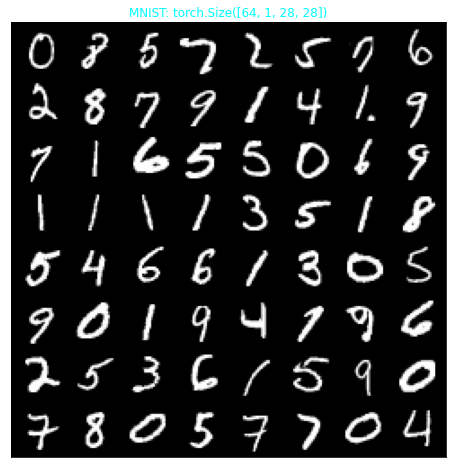

In [13]:
from torchvision.utils import make_grid
from matplotlib import pyplot as plt

def np_make_grid(images):
    img = make_grid(images)
    npimg = img.numpy()
    npimg = np.transpose(npimg, (1, 2, 0))
    return npimg

images, labels = next(iter(train_loader))

plt.figure(figsize=(8,8))
plt.imshow(np_make_grid(images));
plt.xticks([])
plt.yticks([])
plt.title(f"MNIST: {images.shape}", color="cyan");

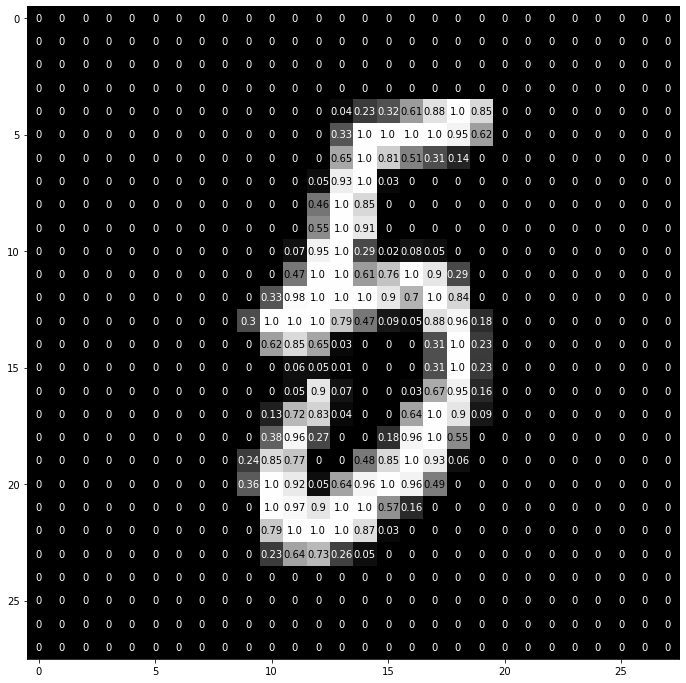

In [17]:
img = np.squeeze(images[2]).numpy()

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] != 0 else 0
        ax.annotate(
            str(val), xy=(y,x),
            horizontalalignment='center',
            verticalalignment='center',
            color='white' if img[x][y]<thresh else 'black')

## Dataset Transforms and Augmentation

Augment the datasets with Torch's [transforms](https://pytorch.org/docs/stable/torchvision/transforms.html) to make your NN more statistically invariant.

```python
# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
```

- **Image resizing:** a common pre-processing step for CNNs and typically resized to a power of 2
- **Data normalization:** is typically done by subtracting the mean (the average of all pixel values) from each pixel, and then dividing the result by the standard deviation of all the pixel values. The distribution of such data should resemble a Gaussian function centered at zero. For image inputs we need the pixel numbers to be positive, so we often choose to scale the data in a normalized range [0,1].
- **Invariance:** the NN correctly identifies the object in the image reguardless of the objects:
    - size
    - location (translation)
    - rotation
- **Data Augmentation:** adding versions of scaled, rotated, and translated versions of your images to your training dataset

## Working with Custom Dataset

Here we have a set of flower pictures stored in a folder and want to import them. They are setup in the folder as described above.

```python
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

data_dir = "flowers"
train_transforms = transforms.Compose(
    [
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(
            [0.485, 0.456, 0.406],
            [0.229, 0.224, 0.225])
    ])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
trainloader = DataLoader(train_data, batch_size=64, shuffle=True)
```